# Naive Implementation of DenseNet121 on cifar 10 Dataset.

#### Firstly we load the cifar 10 dataset and we preprocess the data.

In [174]:
#Here we are loading cifar10 dataset directly from keras.
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#here we are changing the type of data and normalizing them
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0 
X_test = X_test / 255.0
#here we transform the data to pass into our model.
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
y_train.shape

(50000, 10)

In [309]:
label_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
label_arr = y_test.astype(int)
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

C:\Users\Lohit\anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]')

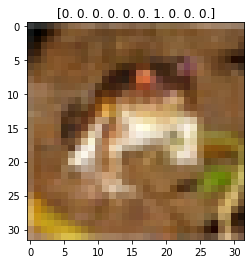

In [130]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])
plt.title(y_train[0])

#### Here we are using a pre-trained model DENSENET, which was already trained on Imagenet Data Set. To this base model now add a couple of our own filters to increase the accuracy.

In [17]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import LearningRateScheduler, EarlyStopping
from keras import optimizers, losses, activations, models
from keras.layers import Dense, Input, Flatten, Dropout, GlobalAveragePooling2D
from keras import applications

nclass = 10

base_model = applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32,3))
base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(GlobalAveragePooling2D())
add_model.add(Dense(nclass, activation='Softmax'))

model = add_model
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4,momentum=0.9),metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 7,047,754
Trainable params: 10,250
Non-trainable params: 7,037,504
_________________________________________________________________


In [131]:
history = model.fit(X_train, y_train, epochs=10, shuffle=True, verbose=True, validation_data=(X_test,y_test))

Epoch 1/10
1563/1563 [==============================] - 230s 147ms/step - loss: 1.0926 - accuracy: 0.6220 - val_loss: 1.1192 - val_accuracy: 0.6138
Epoch 2/10
1563/1563 [==============================] - 229s 146ms/step - loss: 1.0873 - accuracy: 0.6240 - val_loss: 1.1147 - val_accuracy: 0.6171
Epoch 3/10
1563/1563 [==============================] - 229s 146ms/step - loss: 1.0819 - accuracy: 0.6263 - val_loss: 1.1119 - val_accuracy: 0.6175
Epoch 4/10
1563/1563 [==============================] - 221s 141ms/step - loss: 1.0771 - accuracy: 0.6284 - val_loss: 1.1095 - val_accuracy: 0.6175
Epoch 5/10
1563/1563 [==============================] - 222s 142ms/step - loss: 1.0729 - accuracy: 0.6293 - val_loss: 1.1064 - val_accuracy: 0.6182
Epoch 6/10
1563/1563 [==============================] - 214s 137ms/step - loss: 1.0688 - accuracy: 0.6304 - val_loss: 1.1015 - val_accuracy: 0.6209
Epoch 7/10
1563/1563 [==============================] - 216s 138ms/step - loss: 1.0649 - accuracy: 0.6317 - val_

In [148]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 42s 134ms/step - loss: 1.0921 - accuracy: 0.6224


In [178]:
predict = model.predict(X_test)

313/313 [==============================] - 38s 121ms/step


In [184]:
predict.shape

(10000, 10)

In [188]:
X_test.shape

(10000, 32, 32, 3)

In [189]:
y_test.shape

(10000, 10)

In [190]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [369]:
def plot_image(imageID):
    plt.imshow(X_test[imageID])
    plt.xlabel(f'The Original Name is {label_names[label_arr[imageID]]}', fontsize = 12)
    plt.title(f'The Predicted name is {label_names[np.argmax(predict[imageID])]}', fontsize = 12)
    plt.show()

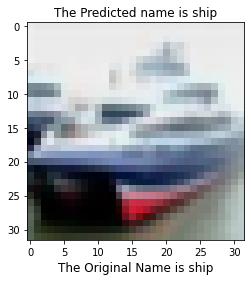

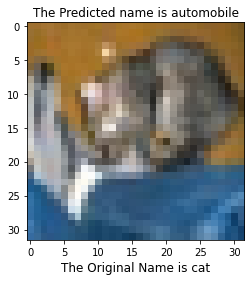

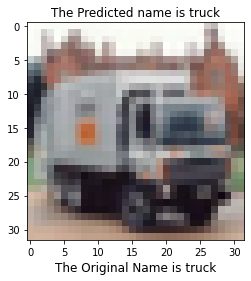

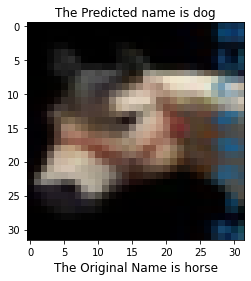

In [370]:
plot_image(1)
plot_image(0)
plot_image(11)
plot_image(57)

In [371]:
import random 

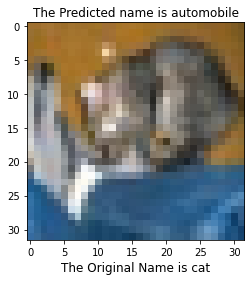

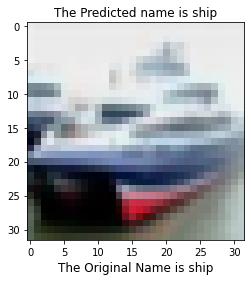

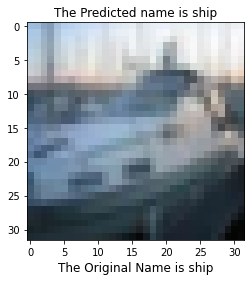

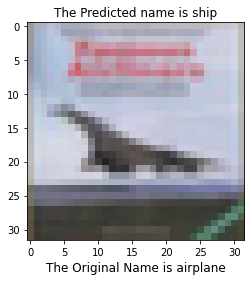

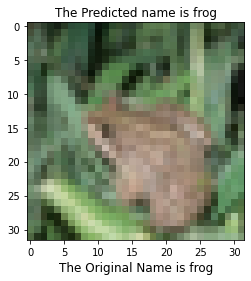

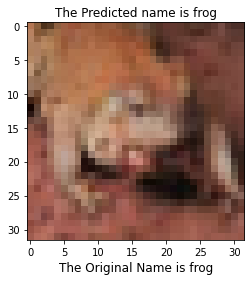

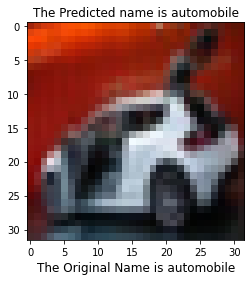

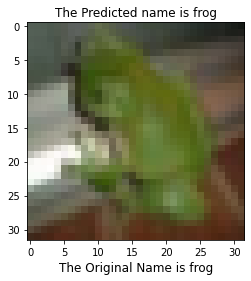

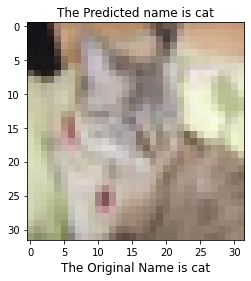

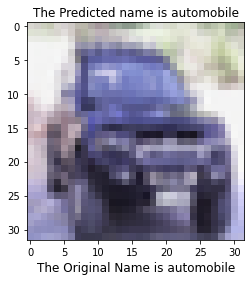

In [372]:
#THE FIRST 10 IMAGES
i= 0;
while i<10:
    plot_image(i)
    i += 1

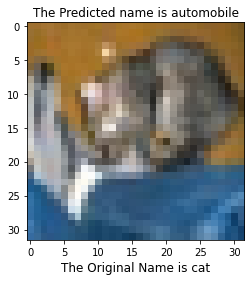

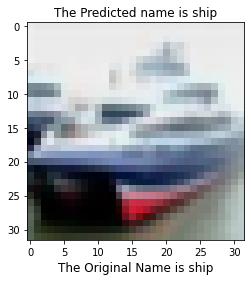

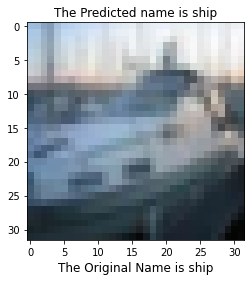

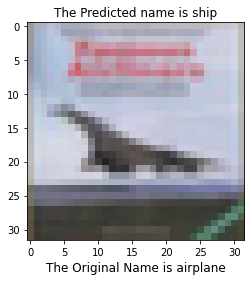

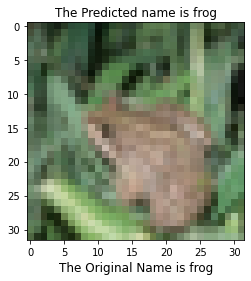

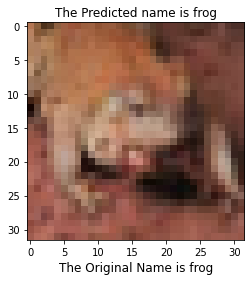

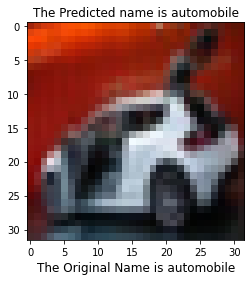

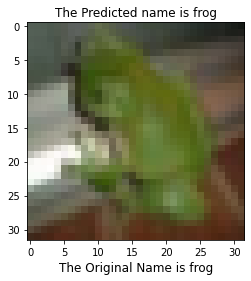

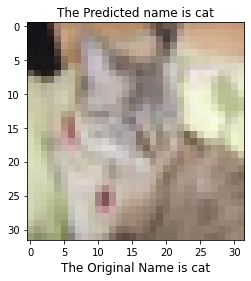

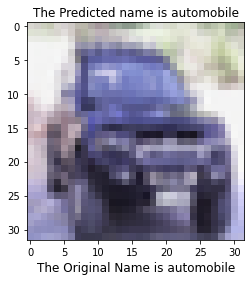

In [373]:
#Random 10 Images
r = random.randint(0, 10000)
i= 0;
while i<10:
    plot_image(i)
    i +=1